In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import shapiro
import re
from datetime import datetime
import os

In [3]:
cov = pd.read_csv('covid.csv',sep=';')
pop = pd.read_csv('countryPopulation.csv',sep=';')

In [4]:
cov.head(2)

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths
0,2020-01-03,Afghanistan,0,0,0,0
1,2020-01-04,Afghanistan,0,0,0,0


In [5]:
pop.shape

(235, 5)

In [6]:
idx = cov.Date == '2020-11-05'
tmp = cov.loc[idx]
tmp.head()

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths
307,2020-11-05,Afghanistan,86,41814,4,1548
615,2020-11-05,Albania,396,22300,4,536
923,2020-11-05,Algeria,0,57942,0,1964
1231,2020-11-05,American Samoa,0,0,0,0
1539,2020-11-05,Andorra,135,5045,0,75


In [7]:
tmp.Cumdeaths.describe()

count       235.000000
mean       5199.068085
std       21811.660309
min           0.000000
25%          12.500000
50%         128.000000
75%        1239.500000
max      231034.000000
Name: Cumdeaths, dtype: float64

In [8]:
data = tmp.merge(pop,on='Country')
idx = data.Country != 'other'
data = data.loc[idx]
print(data.shape)
data.head()

(229, 10)


,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths,geo,zone,island,c2020
0,2020-11-05,Afghanistan,86,41814,4,1548,Asia,south,no,38928341
1,2020-11-05,Albania,396,22300,4,536,Europe,south,no,2877800
2,2020-11-05,Algeria,0,57942,0,1964,Africa,North,no,43851043
3,2020-11-05,American Samoa,0,0,0,0,Australia,south,yes,55197
4,2020-11-05,Andorra,135,5045,0,75,Europe,south,no,77265


In [9]:
set(data.Country)

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua And Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State Of)',
 'Bonaire, Sint Eustatius And Saba',
 'Bosnia And Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote D'Ivoire",
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Democratic Republic Of The Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'E

# analysis

In [10]:
data.Cumdeaths.describe()

count       229.000000
mean       5329.445415
std       22081.603486
min           0.000000
25%          12.000000
50%         129.000000
75%        1318.000000
max      231034.000000
Name: Cumdeaths, dtype: float64

# gauss pdf

In [11]:
def myPdf(data,n=100):
    '''Args:
        data: pd Series
        n:    int, number of bins'''
    data = data.copy()
    mu = data.mean()
    s = data.std()
    rng = (data.min(),data.max())
    x = np.random.uniform(*rng,n)
    x.sort()
    y = (1/(s*(2*np.pi)**0.5))*np.exp(-0.5*((x-mu)/s)**2)
    return x, y

In [12]:
data.head()

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths,geo,zone,island,c2020
0,2020-11-05,Afghanistan,86,41814,4,1548,Asia,south,no,38928341
1,2020-11-05,Albania,396,22300,4,536,Europe,south,no,2877800
2,2020-11-05,Algeria,0,57942,0,1964,Africa,North,no,43851043
3,2020-11-05,American Samoa,0,0,0,0,Australia,south,yes,55197
4,2020-11-05,Andorra,135,5045,0,75,Europe,south,no,77265


In [13]:
x,y = myPdf(data.Cumdeaths)

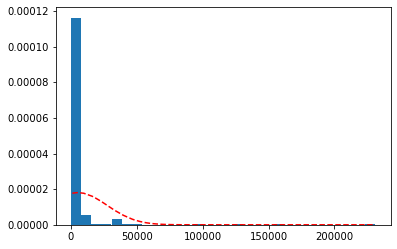

In [14]:
plt.hist(data.Cumdeaths, bins=30, density=True)
plt.plot(x,y,'--r')

In [15]:
from scipy.stats import shapiro

In [16]:
shapiro(data.Cumdeaths) 

ShapiroResult(statistic=0.24468207359313965, pvalue=1.6522613178208858e-29)

In [17]:
print('stats: {:.3f}\tp-val: {:.9f}'.format(*shapiro(data.Cumdeaths)))

stats: 0.245	p-val: 0.000000000


In [18]:
data.sort_values('Cumdeaths',inplace=True)
tmp = data[data.Cumdeaths > 20]
tmp.shape

(169, 10)

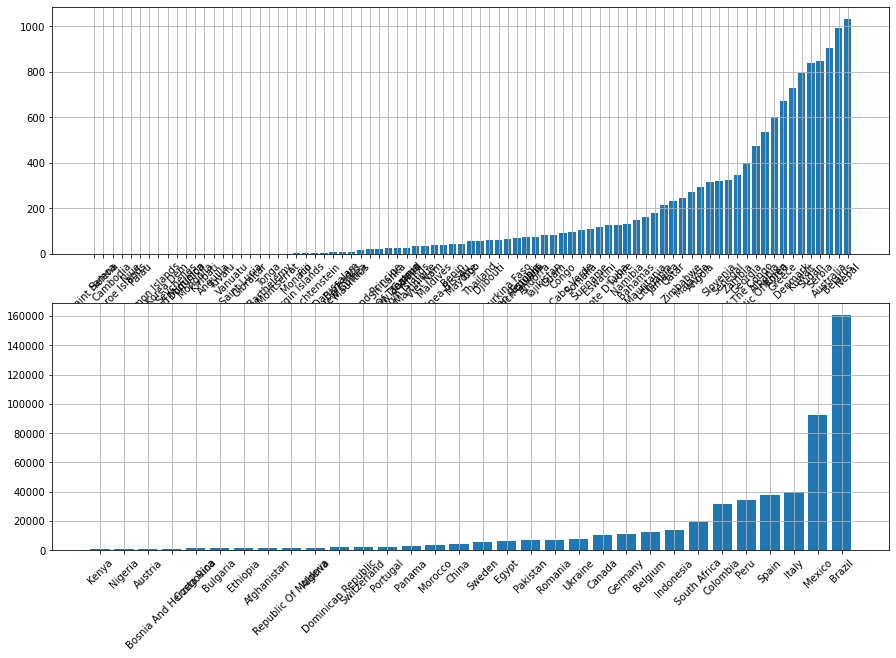

In [19]:
d1 = data.iloc[:165:2,:]
d2 = data.iloc[165::2,:]

f=plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.bar(d1.Country, d1.Cumdeaths)
plt.xticks(rotation=45)
plt.grid()

plt.subplot(2,1,2)
plt.bar(d2.Country, d2.Cumdeaths)
plt.xticks(rotation=45)
plt.grid()


In [20]:
# division of data into 4 parts
# division boundaries 'db'
db = np.round(np.linspace(0,tmp.shape[0],5),0).astype(int).tolist()
db

[0, 42, 84, 127, 169]

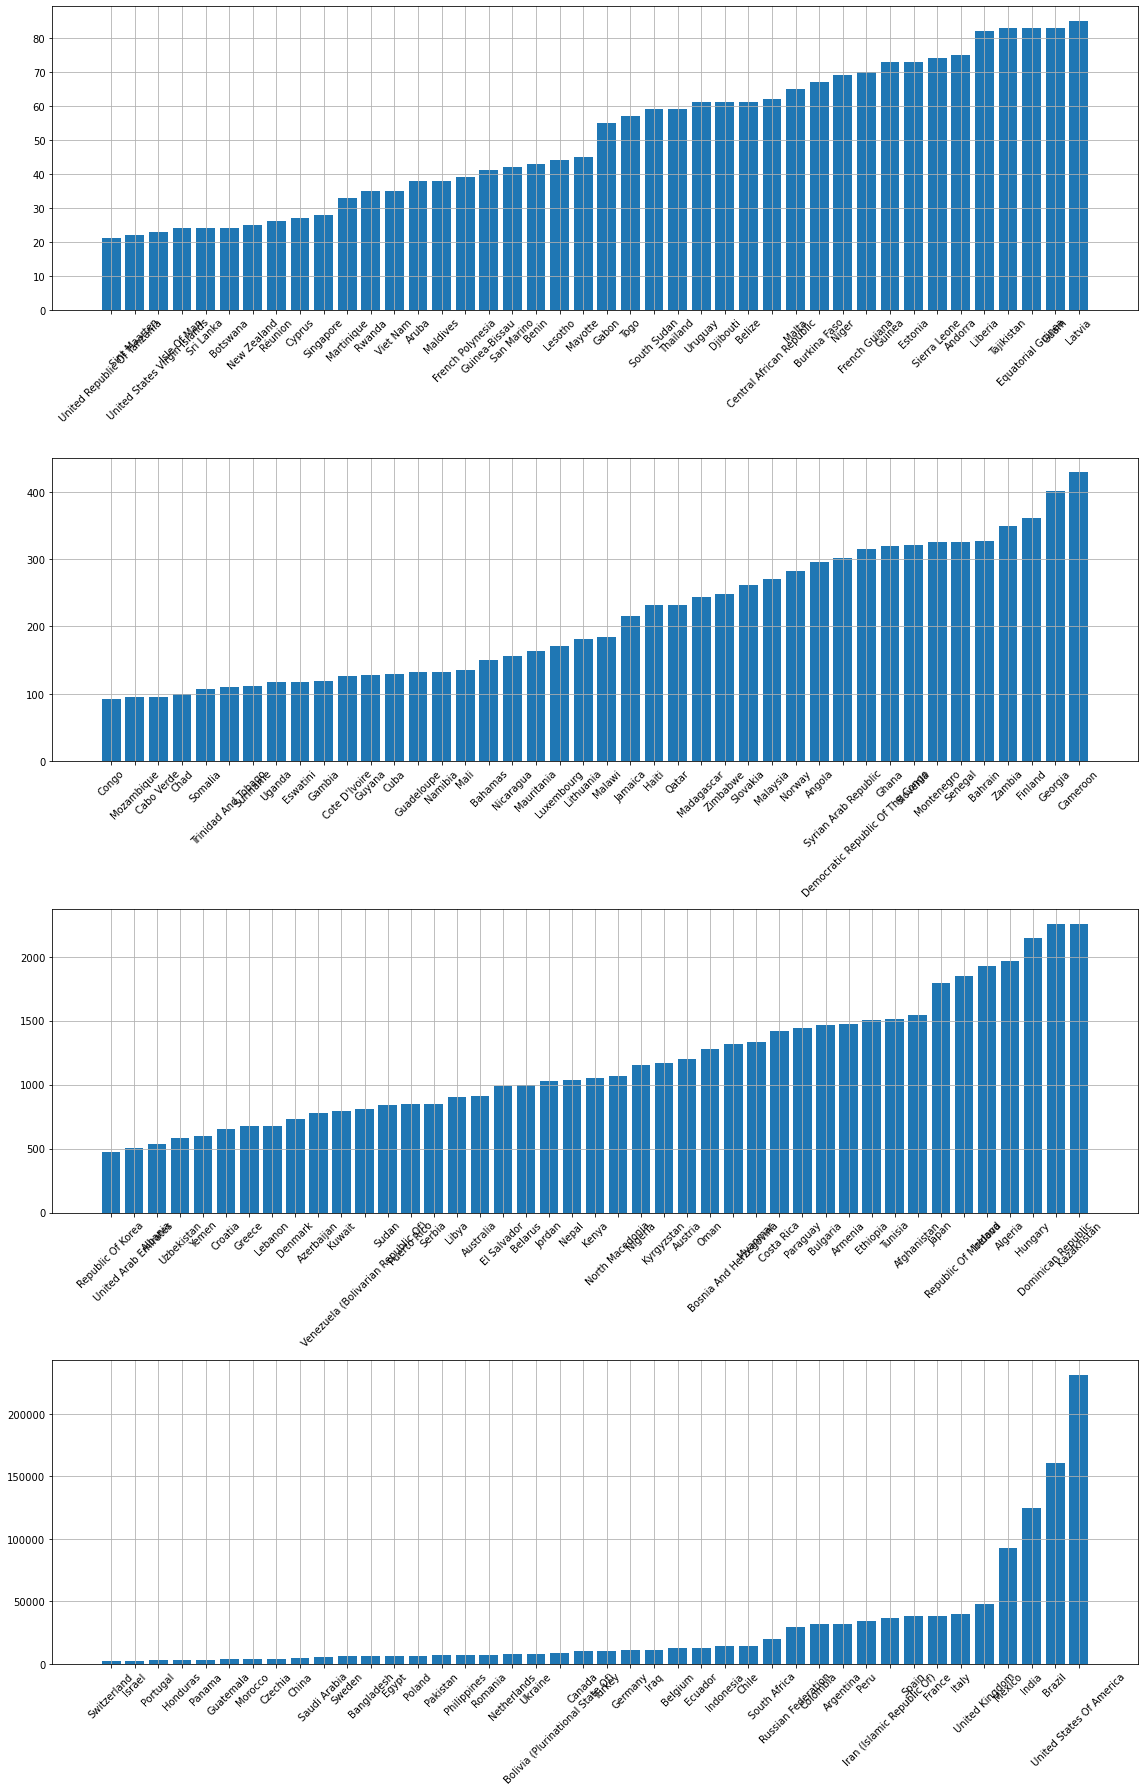

In [21]:
f= plt.figure(figsize=(16,25))

for i,v in enumerate(db[:-1]):
    tmp1 = tmp.iloc[db[i]:db[i+1]]

    plt.subplot(4,1,i+1)
    plt.bar(tmp1.Country,tmp1.Cumdeaths)
    plt.xticks(rotation=45)
    plt.grid()


plt.tight_layout()

In [22]:
cof = np.polyfit(data.c2020,data.Cumdeaths,1)
cof

array([6.94600687e-05, 2.97661055e+03])

In [23]:
# constructs a polynomial based on its coefficients
poly = np.poly1d(cof)
print(poly)

 
6.946e-05 x + 2977


In [24]:
np.corrcoef(data.c2020, data.Cumdeaths)

array([[1.        , 0.43040166],
       [0.43040166, 1.        ]])

In [25]:
# Calculate the y-values for the fitting line
yLine = poly(data.c2020)
yLine[:5]

array([2977.03224199, 3068.18962183, 2990.39212215, 2977.3630803 ,
       4137.91142448])

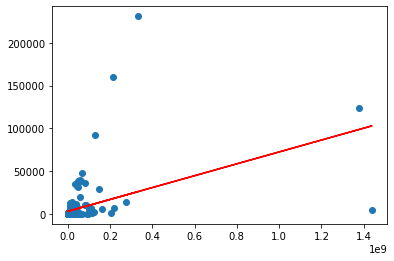

In [26]:
# plot scatter end firring line
plt.scatter(data.c2020,data.Cumdeaths)
plt.plot(data.c2020,yLine,'r')

In [27]:
np.corrcoef(data.c2020,data.Cumdeaths)

array([[1.        , 0.43040166],
       [0.43040166, 1.        ]])

In [28]:
data.loc[:,'perMln'] = np.round((data.Cumdeaths/data.c2020)*10**6,1)
data = data.sort_values('perMln',ascending=False)
data.head()

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths,geo,zone,island,c2020,perMln
215,2020-11-05,San Marino,8,1002,0,42,Europe,south,no,33938,1237.6
19,2020-11-05,Belgium,9,468118,33,12331,Europe,west,no,11589616,1064.0
195,2020-11-05,Peru,2357,908902,38,34623,America,south,no,32971845,1050.1
4,2020-11-05,Andorra,135,5045,0,75,Europe,south,no,77265,970.7
230,2020-11-05,Spain,25042,1284408,1623,38118,Europe,south,no,46754783,815.3


In [29]:
tmp = data[data.perMln > 100]
print(f'Shape: {tmp.shape}')
tmp = tmp.sort_values('perMln')
tmp.head(3)

Shape: (87, 11)


,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths,geo,zone,island,c2020,perMln
77,2020-11-05,Georgia,2401,49218,20,401,Asia,west,no,3989175,100.5
66,2020-11-05,Eswatini,13,5955,0,117,Africa,south,no,1160164,100.8
141,2020-11-05,Jordan,4658,91234,62,1029,Asia,west,no,10203140,100.9


In [30]:
# division of data into 2 parts
# division boundaries 'db'
db = np.round(np.linspace(0,tmp.shape[0],3),0).astype(int).tolist()
db

[0, 44, 87]

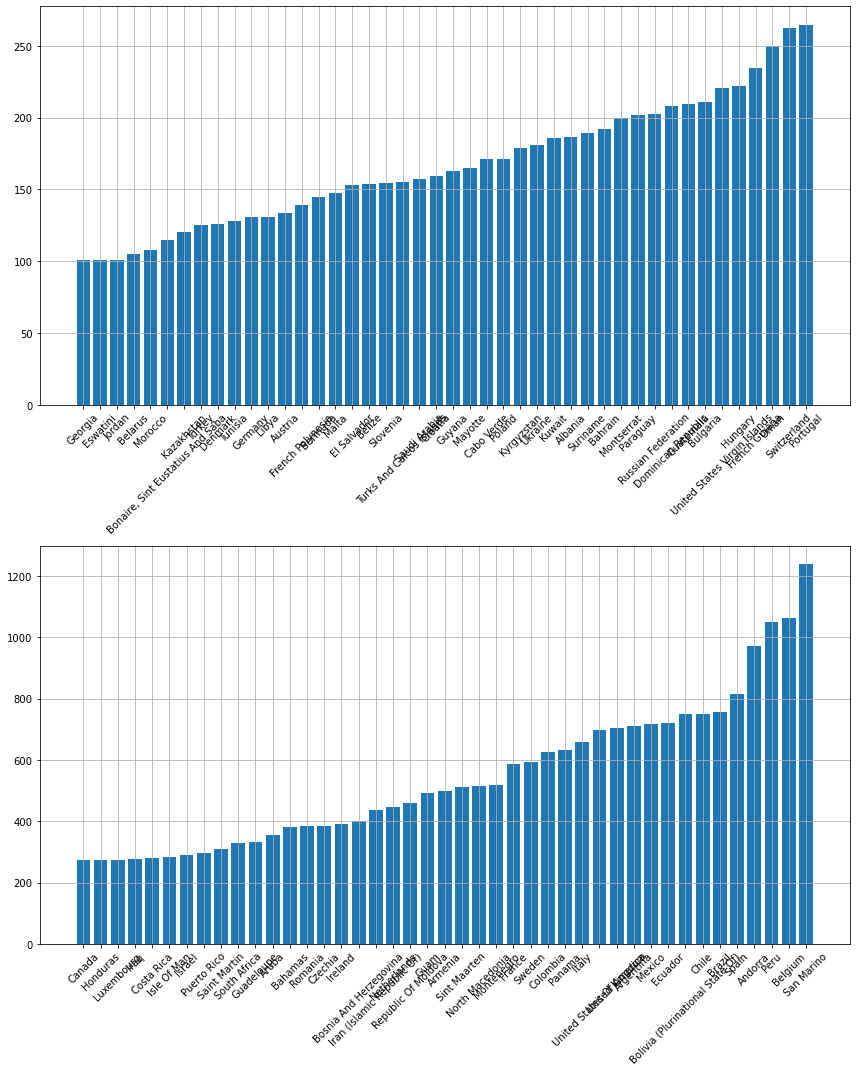

In [31]:
f= plt.figure(figsize=(12,15))

for i,v in enumerate(db[:-1]):
    tmp1 = tmp.iloc[db[i]:db[i+1]]

    plt.subplot(2,1,i+1)
    plt.bar(tmp1.Country,tmp1.perMln)
    plt.xticks(rotation=45)
    plt.grid()


plt.tight_layout()

In [33]:
data.head()

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths,geo,zone,island,c2020,perMln
215,2020-11-05,San Marino,8,1002,0,42,Europe,south,no,33938,1237.6
19,2020-11-05,Belgium,9,468118,33,12331,Europe,west,no,11589616,1064.0
195,2020-11-05,Peru,2357,908902,38,34623,America,south,no,32971845,1050.1
4,2020-11-05,Andorra,135,5045,0,75,Europe,south,no,77265,970.7
230,2020-11-05,Spain,25042,1284408,1623,38118,Europe,south,no,46754783,815.3


In [34]:
print(data.columns.to_list())
col = ['CumCases', 'Cumdeaths', 'geo', 'perMln']
tmp = data.loc[:,col].copy()
tmp.head()

['Date', 'Country', 'Ncases', 'CumCases', 'Ndeaths', 'Cumdeaths', 'geo', 'zone', 'island', 'c2020', 'perMln']


,CumCases,Cumdeaths,geo,perMln
215,1002,42,Europe,1237.6
19,468118,12331,Europe,1064.0
195,908902,34623,America,1050.1
4,5045,75,Europe,970.7
230,1284408,38118,Europe,815.3


In [35]:
gr = tmp.groupby('geo')
gr

In [36]:
gr.describe()

CumCases                                                       \
             count           mean           std   min      25%      50%   
geo                                                                       
Africa        57.0   32231.298246  1.014387e+05   0.0   2413.0   5955.0   
America       55.0  381842.454545  1.452494e+06   3.0    179.5   4538.0   
Asia          47.0  298402.723404  1.212338e+06   0.0   5532.0  61309.0   
Australia     23.0    1918.521739  5.995748e+03   0.0      0.0      0.0   
Europe        47.0  232591.127660  4.070388e+05  26.0  11841.0  53849.0   

                               Cumdeaths                ...                    \
                75%        max     count          mean  ...     75%       max   
geo                                                     ...                     
Africa      15650.0   730548.0      57.0    771.438596  ...   315.0   19585.0   
America    103917.5  9281928.0      55.0  11770.781818  ...  1849.0  231034.0   
Asia       145017.5  8364086.0      47.0   5297.106383  ...  2026.5  124315.0   
Australia      65.0    27622.0      23.0     46.304348  ...     2.0     907.0   
Europe     229395.5  1712858.0      47.0   5937.212766  ...  5065.0   47742.0   

          perMln                                                            
           count        mean         std  min    25%    50%    75%     max  
geo                                                                         
Africa      57.0   34.684211   57.205874  0.0   5.60   12.8   35.1   330.2  
America     55.0  240.356364  270.683810  0.0  18.95  155.0  321.4  1050.1  
Asia        47.0   80.880851  112.798810  0.0   5.85   35.5  100.7   498.1  
Australia   23.0   30.830435  104.832071  0.0   0.00    0.0    1.5   491.8  
Europe      47.0  298.291489  293.827579  0.0  72.80  186.3  424.7  1237.6  

[5 rows x 24 columns]

In [37]:
type(gr.sum())
gr.sum()

,CumCases,Cumdeaths,perMln
geo,,,
Africa,1837184,43972,1977.0
America,21001335,647393,13219.6
Asia,14024928,248964,3801.4
Australia,44126,1065,709.1
Europe,10931783,279049,14019.7


In [38]:
ss = gr.sum().sort_values('Cumdeaths')
ss.index

Index(['Australia', 'Africa', 'Asia', 'Europe', 'America'], dtype='object', name='geo')

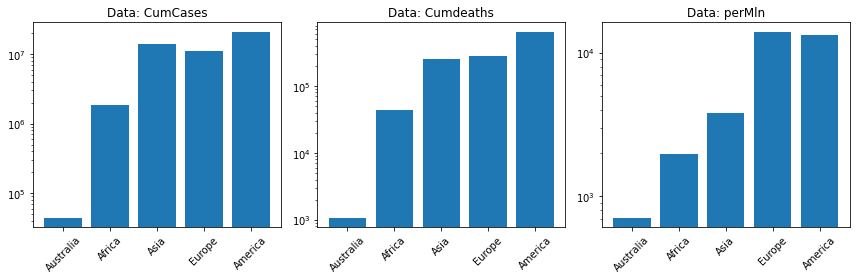

In [41]:
f = plt.figure(figsize=(12,4))
for i,c in enumerate(ss.columns,1):
    plt.subplot(1,3,i)
    plt.bar(ss.index,ss[c],log=True)
    plt.title(f'Data: {c}')
    plt.xticks(rotation=45)
    
plt.tight_layout()

# Anova

In [42]:
from scipy.stats import f_oneway

In [43]:
grGeo = data.groupby('geo')['Cumdeaths']
grGeo.describe()

,count,mean,std,min,25%,50%,75%,max
geo,,,,,,,,
Africa,57.0,771.438596,2734.898830,0.0,45.0,95.0,315.0,19585.0
America,55.0,11770.781818,39421.520646,0.0,2.0,110.0,1849.0,231034.0
Asia,47.0,5297.106383,18726.585196,0.0,36.5,602.0,2026.5,124315.0
Australia,23.0,46.304348,188.586473,0.0,0.0,0.0,2.0,907.0
Europe,47.0,5937.212766,11956.806846,0.0,128.0,850.0,5065.0,47742.0


In [44]:
dd = grGeo.groups
dd

{'Africa': [228, 34, 166, 152, 245, 173, 66, 216, 57, 61, 63, 176, 76, 2, 164, 203, 75, 124, 150, 143, 218, 232, 263, 45, 264, 36, 151, 67, 39, 79, 27, 157, 221, 5, 156, 44, 165, 241, 160, 227, 40, 184, 123, 229, 48, 21, 55, 32, 174, 183, 206, 250, 253, 33, 220, 64, 208], 'America': [195, 28, 41, 24, 60, 167, 8, 254, 192, 43, 223, 14, 10, 84, 211, 199, 47, 128, 37, 73, 255, 86, 59, 194, 172, 233, 125, 248, 20, 62, 22, 25, 163, 244, 139, 29, 7, 259, 17, 182, 126, 256, 38, 50, 51, 83, 82, 212, 68, 209, 58, 207, 210, 6, 213], 'Asia': [9, 133, 137, 134, 189, 15, 145, 146, 217, 246, 142, 141, 77, 149, 131, 200, 13, 159, 196, 132, 252, 0, 16, 178, 190, 175, 52, 262, 257, 236, 140, 201, 237, 158, 30, 222, 42, 231, 238, 260, 54, 35, 247, 240, 147, 170, 23], 'Australia': [85, 74, 11, 187, 181, 70, 193, 214, 46, 226, 191, 177, 185, 180, 243, 162, 261, 3, 258, 168, 249, 144, 242], 'Europe': [215, 19, 4, 230, 239, 138, 234, 72, 171, 186, 202, 179, 26, 135, 53, 204, 136, 155, 198, 235, 129, 31, 205

In [46]:
f,pval = f_oneway(*dd.values())
print(f,pval)

1.6861135343528737 0.15412588333318605


In [47]:
sl = {}
for gr in ['geo', 'zone', 'island']:
    val = data.groupby(gr)['Cumdeaths'].groups.values()
    sl[gr] = f_oneway(*val)
    
pd.DataFrame(sl,index=['f_stat','p_val'])

,geo,zone,island
f_stat,1.686114,0.967987,0.104235
p_val,0.154126,0.425853,0.747103


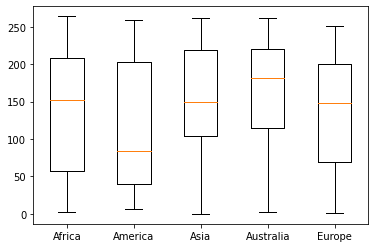

In [49]:
plt.boxplot(dd.values(), labels = dd.keys());